In [1]:
#import for data manipulation
import numpy as np
import pandas as pd
#for PCA and kmeans clustering
from sklearn.decomposition import PCA
from sklearn import preprocessing
#we use the label encoder to transform strings into numeric values
from sklearn.preprocessing import LabelEncoder
#for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/rohanshenoy/Downloads/Clustering_dataset.zip")
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
#we drop the a few columns from the dataset and new dataset is X
X = data.drop('Date', axis=1)
X=X.drop('Location',axis=1)
label_encoder = LabelEncoder()
#we use label encoder to emcode the categorical column which have strings 
X['WindGustDir'] = label_encoder.fit_transform(X['WindGustDir'])
X['WindDir9am'] = label_encoder.fit_transform(X['WindDir9am'])
X['WindDir3pm'] = label_encoder.fit_transform(X['WindDir3pm'])

#replace all NaN values with 0
X=X.fillna(0)

X=X.replace('Yes','1')
X=X.replace('No','0')
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,0.0,0.0,13,44.0,13,14,20.0,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,7.4,25.1,0.0,0.0,0.0,14,44.0,6,15,4.0,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,0
2,12.9,25.7,0.0,0.0,0.0,15,46.0,13,15,19.0,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0
3,9.2,28.0,0.0,0.0,0.0,4,24.0,9,0,11.0,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,0
4,17.5,32.3,1.0,0.0,0.0,13,41.0,1,7,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,0.0,0.0,0,31.0,9,1,13.0,...,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,0,0
145456,3.6,25.3,0.0,0.0,0.0,6,22.0,9,3,13.0,...,56.0,21.0,1023.5,1019.1,0.0,0.0,10.9,24.5,0,0
145457,5.4,26.9,0.0,0.0,0.0,3,37.0,9,14,9.0,...,53.0,24.0,1021.0,1016.8,0.0,0.0,12.5,26.1,0,0
145458,7.8,27.0,0.0,0.0,0.0,9,28.0,10,3,13.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


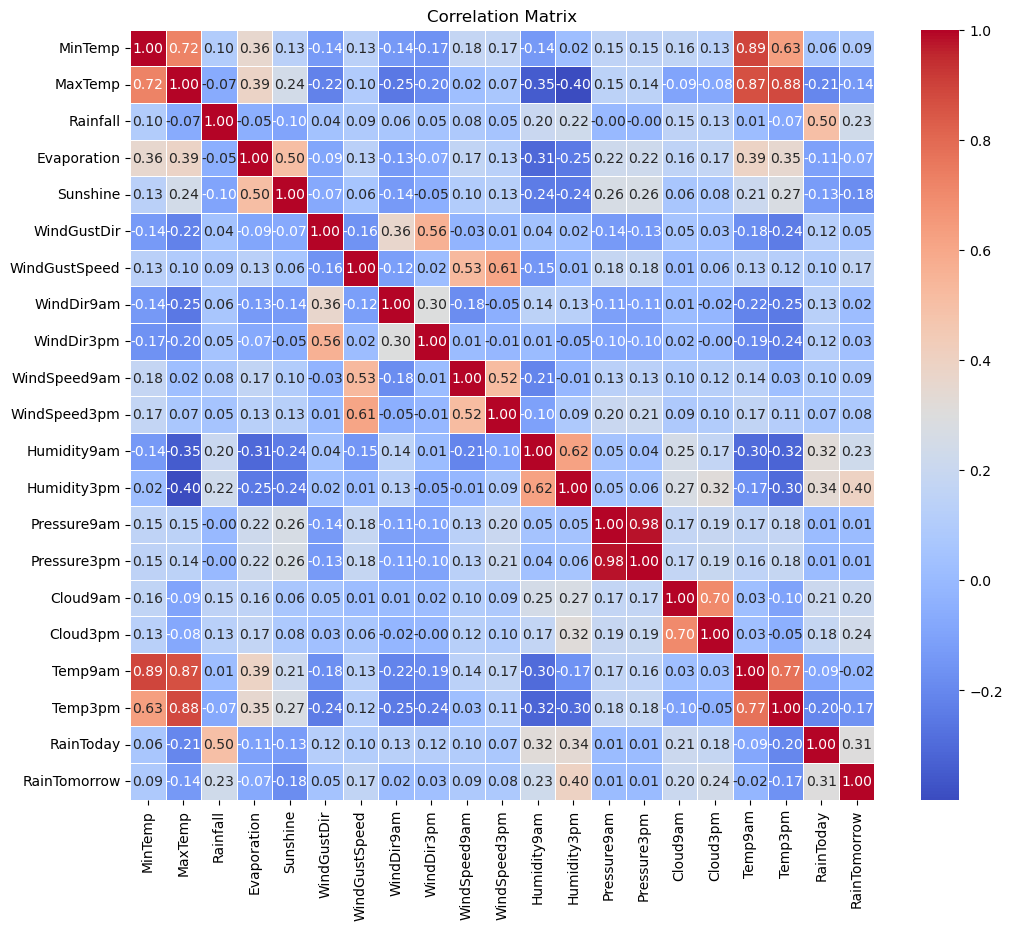

In [4]:
#we create a corellation matrix 
correlation_matrix = X.corr()
# we display it as a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
#note: correlation matrix is helpful in multivariable analysis
#it is helpful in understanding relations between variables

In [5]:
#we print the first few rows of the dataset
#to anaylse/inspect the structure and content of the dataframe 
print(X.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0     13.4     22.9       0.6          0.0       0.0           13   
1      7.4     25.1       0.0          0.0       0.0           14   
2     12.9     25.7       0.0          0.0       0.0           15   
3      9.2     28.0       0.0          0.0       0.0            4   
4     17.5     32.3       1.0          0.0       0.0           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0           44.0          13          14          20.0  ...         71.0   
1           44.0           6          15           4.0  ...         44.0   
2           46.0          13          15          19.0  ...         38.0   
3           24.0           9           0          11.0  ...         45.0   
4           41.0           1           7           7.0  ...         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1       8.0     

In [6]:
#shows the number of rows and columns of the dataset
print(X.shape)

(145460, 21)


In [7]:
#PCA

#we standardize the data by subtracting the mean and dividing by the std. deviation for each feature
#we use X.T to transpose the dataset to ensure that each column represents a feature
X_scaled = preprocessing.scale(X.T)
#we set num components to the min. no. of rows and columns in the dataframe
#we do this to limit the no. of principal components
num_components = min(X.shape[0], X.shape[1])  
#we initialize pca object from scikit learn with the specific no. of components
pca = PCA(num_components) #n_components=num components
#we perform pca on the standardized data
X_pca = pca.fit_transform(X_scaled)
# The fit_transform method fits the PCA model and transforms the input data into the principal components
#X_pca contains the dataset in the reduced dimensional space defined by the principal components

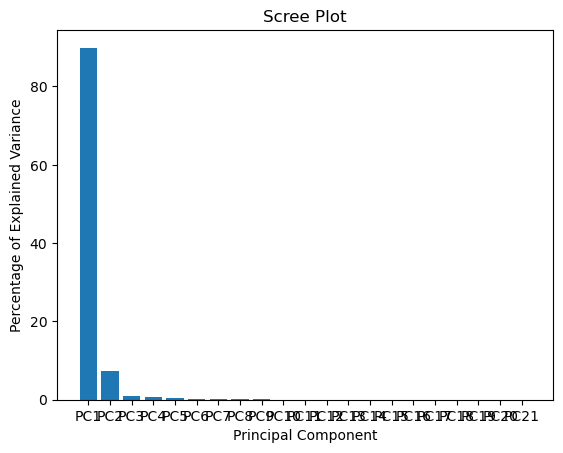

In [8]:
#we now plot to visualize the variance of each principal component

#we calculate the percentage variance of each of the principal comps.
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)    
#we create labels for the principal comps. PC1,PC2.....
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

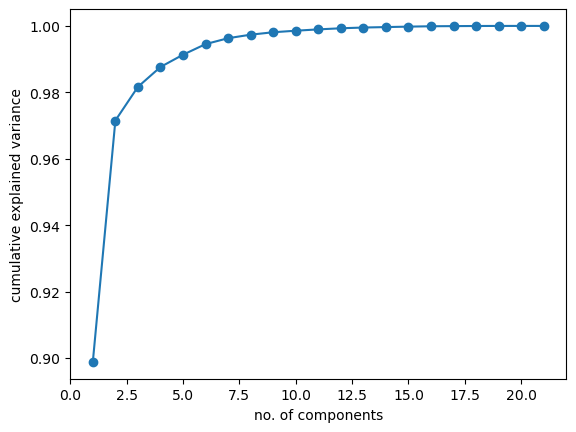

In [9]:
#we plot the cumulative explained variance against no. of components
plt.plot(range(1,22),pca.explained_variance_ratio_.cumsum(),marker = 'o')
plt.xlabel("no. of components")
plt.ylabel("cumulative explained variance")
plt.show()

In [10]:
#we create a new pca with num of comps set to 2 (we got this from scree plot)
#we want to reduce the dimensionality to 2 prinicipal components
pca1 = PCA(n_components=2)
pca1.fit_transform(X_pca)
#we fit the pca model to the already transformed data X_pca which was transformed initially by pca

array([[-120.02201615,  -25.45938783],
       [-111.3970496 ,   47.43964727],
       [-129.29231991,  -73.57014592],
       [-127.40281951,  -83.81172242],
       [-126.25127238,  -84.46994137],
       [-126.11849396,  -23.87805124],
       [ -96.10625465,   87.11890193],
       [-126.14983558,  -28.88574304],
       [-125.9982355 ,  -30.25197783],
       [-118.37196923,  -21.69896218],
       [-113.71661926,   -6.07600849],
       [ -72.30141676,  342.10834984],
       [ -86.37517341,  210.8207008 ],
       [1114.83716668,  -12.71940054],
       [1112.23419722,  -12.89391206],
       [-128.2337502 ,  -77.64719192],
       [-128.23150867,  -78.71230156],
       [-116.26776866,    7.02729557],
       [-112.41939112,   32.65171233],
       [-131.20807874,  -83.53174154],
       [-131.20739063,  -83.56011979]])

In [11]:
#function to perform kmeans clustering
#we apply kmeans clustering to the pca transformed data

def kmeans(data, k, nstart): #k=no. of clusters, nstart=the no. of times algorithm should be run

    #we randomly select initial clusters from the data without replacement
    np.random.seed(0)
    centers = data[np.random.choice(range(len(data)), k, replace=False)]

    for _ in range(nstart):   #runs this nstart times

        #computes euclidean dist. between data pts. and cluster center
        distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
        #assigns each data pt. to the nearest cluster center based on euclidean dist.
        labels = np.argmin(distances, axis=1)
        #calculates new cluster centers as mean of data pts. assigned to each cluster
        new_centers = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centers == new_centers):
            break                       #breaks the loop if cluster centers dont change
        centers = new_centers

    wcss = 0     #: Initializes the Within-Cluster Sum of Squares (WCSS) to zero

    for i in range(k):   # Iterates over each cluster
        cluster_points = data[labels == i]
        wcss += np.sum(np.linalg.norm(cluster_points - centers[i], axis=1)**2)
        #computes sum of squared dist b/w each data pt in the cluster and the cluster centre and adds it to wcss

    return labels, wcss #Returns the final cluster labels and the WCSS value to the fn

In [12]:
#function to plot the elbow method
#we plot the elbow method to determine the optimal number of clusters

def plot_wcss(data, max_k, nstart):
    #max_k is the maximum no. of clusters to consider, 
    #nstart is the no. of times algorithm should be run

    #initialize an empty list to store wcss
    wcss_values = []
    
    for k in range(1, max_k + 1): #iterates over a range from 1 to kmax

        _, wcss = kmeans(data, k, nstart) #performs kmeans clustering for given k and gives its wcss
        wcss_values.append(wcss)           #we append the wcss value to wcss list
    

    #we plot all the wcss values against their respective k values and see the elbow point by eye
    plt.plot(range(1, max_k + 1), wcss_values, marker='o')  
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.show()

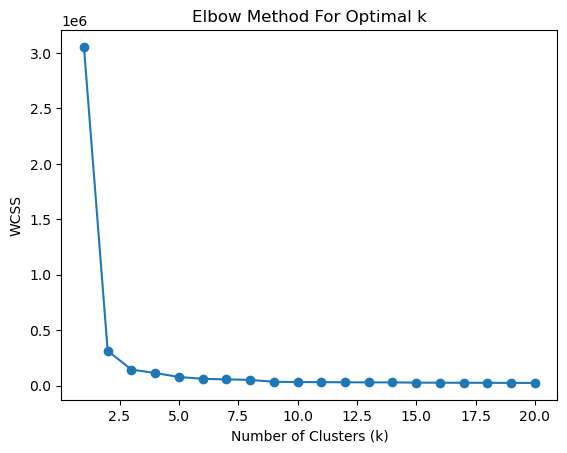

In [14]:
#plotting the elbow method
plot_wcss(X_pca,20,25) #20 is the max value of k and 25 is no. of iterations for kmeans fn

In [16]:
#PLOTTING THE FINAL WCSS FOR DETERMINED K
#we see from above graph that k=2

c1,wcss1 = kmeans(X_pca,2,25)
# 2 is the value of k found by eye from elbow method, 25 is no. of iterations of kmeans

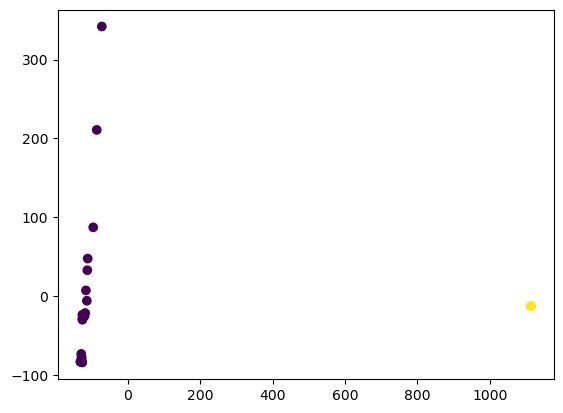

The Within-Cluster Sum of Square is 313327.779763337


In [20]:

#we create a scatter plot of the data pts in the reduced dimensional space obtained from pca
#extracts values of pc1 and pc2 for each datapt. after pca transformation
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=c1)
plt.show()
print("The Within-Cluster Sum of Square is",wcss1)
#Prints the Within-Cluster Sum of Squares (WCSS) for the chosen number of clusters